In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.layers import Dense, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os 
import cv2

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

In [0]:
path=os.path.join('gdrive','My Drive', 'Colab Notebooks','flowers','flowers' )
path

In [0]:
x=[]
y=[]
img_size=150

In [0]:
def label_assignment(img, flower_type):
  return flower_type

In [0]:
def make_label(flower_type, directory):
  for img in tqdm(os.listdir(directory)):
    label=label_assignment(img, flower_type)
    path=os.path.join(directory, img)
    img=cv2.imread(path, cv2.IMREAD_COLOR)
    img=cv2.resize(img, (img_size, img_size))
    
    x.append(np.array(img))
    y.append(str(label))

In [0]:
daisy_flowers=path+'/daisy'
dandelion_flowers=path+'/dandelion'
rose_flowers=path+'/rose'
sunflower_flowers=path+'/sunflower'
tulip_flowers=path+'/tulip'

In [0]:
make_label('Daisy', daisy_flowers)

100%|██████████| 769/769 [08:12<00:00,  2.40it/s]


In [0]:
make_label('Dandelion', dandelion_flowers)

 79%|███████▉  | 833/1055 [09:41<01:51,  1.99it/s]

error: ignored

In [0]:
make_label('Rose', rose_flowers)


100%|██████████| 784/784 [08:46<00:00,  1.91it/s]


In [0]:
make_label('Sunflower', sunflower_flowers)


100%|██████████| 734/734 [09:02<00:00,  2.30it/s]


In [0]:
make_label('Tulip', tulip_flowers)


100%|██████████| 984/984 [11:07<00:00,  2.03it/s]


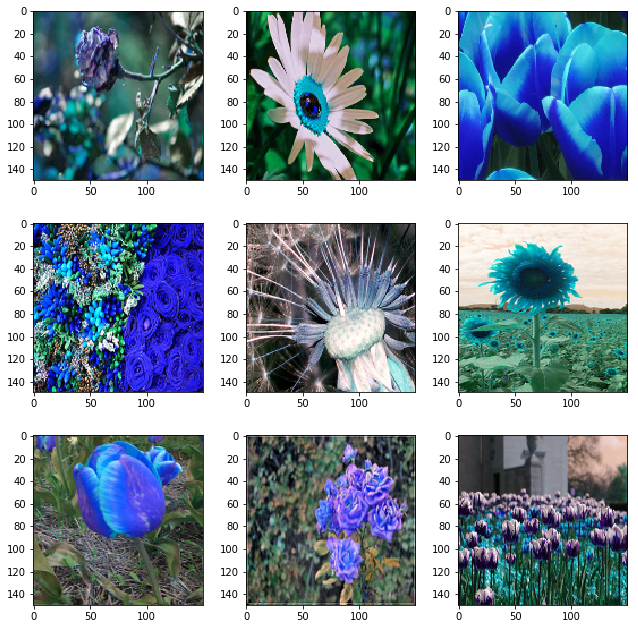

In [0]:
fig, ax=plt.subplots(3,3)
fig.set_size_inches(9,9)
for i in range(3):
  for j in range(3):
    l=rn.randint(0, len(y))
    ax[i,j].imshow(x[l])
    
plt.tight_layout()

In [0]:
le=LabelEncoder()
y=le.fit_transform(y)

In [0]:
categorical_y=to_categorical(y, 5)

In [0]:
X=np.array(x)

In [0]:
X=X.astype('float32')
X=X/255.0

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,categorical_y,test_size=0.2)

In [0]:
xtrain.shape

(3283, 150, 150, 3)

In [0]:
model=Sequential()

W0802 04:01:45.349980 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
          

W0802 04:01:50.125023 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 04:01:50.138959 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 04:01:50.182621 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 04:01:50.258283 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 04:01:50.269314 139645683107712 de

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0802 04:01:54.497933 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 04:01:54.527656 139645683107712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 145, 145, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 143, 143, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 141, 141, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 140, 140, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 138, 138, 128)     73856     
__________

In [0]:
gen_data=ImageDataGenerator( featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=45,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True,
                           vertical_flip=False)

In [0]:
gen_data.fit(xtrain)

In [0]:
history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=5, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

NameError: ignored

In [0]:
#history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=5, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

Epoch 1/5
102/102 [==============================] - 44s 432ms/step - loss: 0.4926 - acc: 0.8102 - val_loss: 0.5660 - val_acc: 0.7771
Epoch 2/5
102/102 [==============================] - 43s 419ms/step - loss: 0.5002 - acc: 0.8135 - val_loss: 0.5599 - val_acc: 0.8088
Epoch 3/5
102/102 [==============================] - 43s 420ms/step - loss: 0.4802 - acc: 0.8193 - val_loss: 0.5635 - val_acc: 0.8039
Epoch 4/5
102/102 [==============================] - 43s 418ms/step - loss: 0.4522 - acc: 0.8323 - val_loss: 0.5690 - val_acc: 0.7795
Epoch 5/5
102/102 [==============================] - 43s 419ms/step - loss: 0.4251 - acc: 0.8394 - val_loss: 0.5370 - val_acc: 0.8051


In [0]:
#history=model.fit_generator(gen_data.flow(xtrain,ytrain,batch_size=64), epochs=2, validation_data=(xtest,ytest), steps_per_epoch=xtrain.shape[0]//32, shuffle=True)

Epoch 1/2
102/102 [==============================] - 44s 428ms/step - loss: 0.4106 - acc: 0.8496 - val_loss: 0.5983 - val_acc: 0.7954
Epoch 2/2
102/102 [==============================] - 42s 416ms/step - loss: 0.4301 - acc: 0.8403 - val_loss: 0.5560 - val_acc: 0.8173


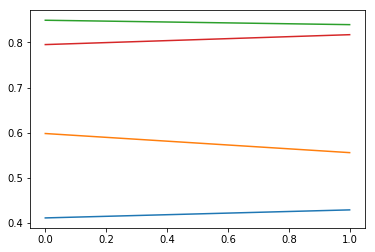

In [0]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])